# Making Csv file of training and testing data
## 1. Training data

In [1]:
import pandas as pd
import numpy as np

In [2]:
feature_names = [line.rstrip().split(' ')[1] for line in open('UCI HAR Dataset/features.txt','r').read().split('\n')]
print(len(feature_names))

561


In [3]:
train=pd.read_csv('UCI HAR Dataset/Train/X_train.txt',names=feature_names,delim_whitespace=True)
print(train.shape)

D:\Program_Files\Anaconda\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(7352, 561)


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [5]:
# Extrating the the labels form the file
y_train_data = [int(line.rstrip()) for line in open('UCI HAR Dataset/train/y_train.txt','r').read().split('\n')]
print(len(y_train_data))

7352


In [6]:
features_dict={}
fp=open('UCI HAR Dataset/activity_labels.txt')
line=fp.readline().strip()
while line:
    features_dict[line.split(' ')[0]]=line.split(' ')[1]
    line=fp.readline().strip()   
print(features_dict)
fp.close()

{'1': 'WALKING', '2': 'WALKING_UPSTAIRS', '3': 'WALKING_DOWNSTAIRS', '4': 'SITTING', '5': 'STANDING', '6': 'LAYING'}


In [7]:
#Just for Showing (No Significance in Model Prediction and Evaluation, Since it is converting un-categrical data to categorical)
new_columns_cat=[features_dict[str(i)] for i in  y_train_data]
print(len(new_columns_cat))

7352


In [8]:
sub_id = [line.rstrip() for line in open('UCI HAR Dataset/Train/subject_train.txt','r').read().split('\n')]
print(len(sub_id))
train['Sub_ID']=sub_id
print(train.shape)

7352
(7352, 562)


In [9]:
train['Activity']=y_train_data
print(train.shape)

(7352, 563)


In [10]:
print(train.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Sub_ID', 'Activity'],
      dtype='object', length=563)


In [11]:
train.to_csv('train.csv',index=False)

## 2. Testing Data

In [12]:
test=pd.read_csv('UCI HAR Dataset/test/X_test.txt',names=feature_names,delim_whitespace=True)
sub_id_test = [line.rstrip() for line in open('UCI HAR Dataset/test/subject_test.txt','r').read().split('\n')]
print(len(sub_id_test))
print(test.columns)

2947
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)


In [13]:
y_test_data = [int(line.rstrip()) for line in open('UCI HAR Dataset/test/y_test.txt','r').read().split('\n')]
print(len(y_test_data))

2947


In [14]:
test['Sub_ID']=sub_id_test
print(test.shape)

(2947, 562)


In [15]:
test['Activity']=y_test_data
print(test.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Sub_ID', 'Activity'],
      dtype='object', length=563)


In [16]:
test.to_csv('test.csv',index=False)

# Data Preprocessing

In [17]:
print("The no of records of each type of class are ::")
for i in range(6):
    print(list(features_dict.values())[i],": ",test.Activity.value_counts().values[i])

The no of records of each type of class are ::
WALKING :  537
WALKING_UPSTAIRS :  532
WALKING_DOWNSTAIRS :  496
SITTING :  491
STANDING :  471
LAYING :  420


### Importing all feature vectors

In [18]:
X_train=train.iloc[:,:-2].values
print(X_train)
Y_train=np.array(y_train_data)
print(Y_train.shape)

[[ 0.28858451 -0.02029417 -0.13290514 ... -0.84124676  0.17994061
  -0.05862692]
 [ 0.27841883 -0.01641057 -0.12352019 ... -0.8447876   0.18028889
  -0.05431672]
 [ 0.27965306 -0.01946716 -0.11346169 ... -0.84893347  0.18063731
  -0.04911782]
 ...
 [ 0.27338737 -0.01701062 -0.04502183 ... -0.77913261  0.24914484
   0.04081119]
 [ 0.28965416 -0.01884304 -0.15828059 ... -0.78518142  0.24643223
   0.02533948]
 [ 0.35150347 -0.01242312 -0.20386717 ... -0.78326693  0.24680852
   0.03669484]]
(7352,)


In [19]:
X_test=test.iloc[:,:-2].values
print(X_test)
Y_test=np.array(y_test_data)
print(Y_test.shape)

[[ 0.25717778 -0.02328523 -0.01465376 ... -0.72000927  0.27680104
  -0.0579783 ]
 [ 0.28602671 -0.01316336 -0.11908252 ... -0.69809082  0.28134292
  -0.08389801]
 [ 0.27548482 -0.02605042 -0.11815167 ... -0.70277146  0.28008303
  -0.0793462 ]
 ...
 [ 0.34996609  0.03007744 -0.11578796 ... -0.65535684  0.27447878
   0.18118355]
 [ 0.23759383  0.01846687 -0.09649893 ... -0.65971859  0.26478161
   0.18756291]
 [ 0.15362719 -0.01843651 -0.13701846 ... -0.66008023  0.26393619
   0.1881034 ]]
(2947,)


# Data Visulaization

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

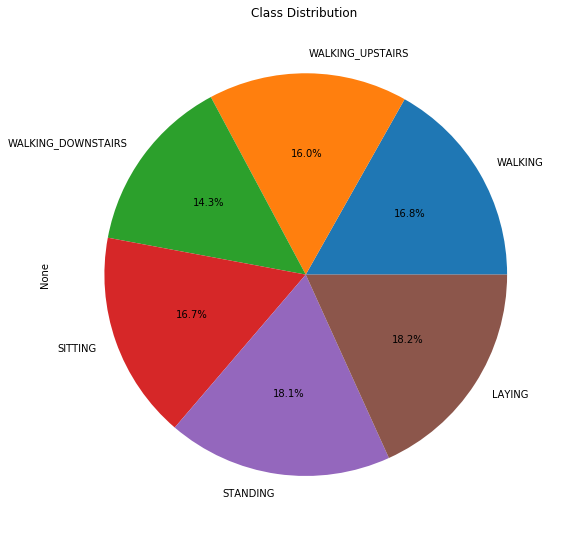

In [21]:
df=test.groupby('Activity').size()
df.index=list(features_dict.values())
df.plot(kind='pie',figsize=(8, 8),autopct='%1.1f%%')
plt.title("Class Distribution ")
plt.tight_layout()
plt.show()

In [22]:
#Data Visualization 
no_of_classes=pd.value_counts(train['Activity'])
print(no_of_classes)

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: Activity, dtype: int64


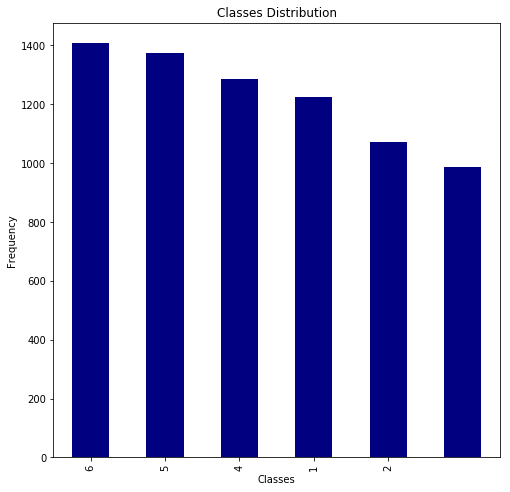

In [23]:
no_of_classes.plot(kind='bar',figsize=(8,8),colormap=cm.get_cmap('jet'))
plt.title("Classes Distribution")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(np.arange(5))
plt.show()